<a href="https://colab.research.google.com/github/aleeofficertraining/Data-Analytics-201/blob/main/final_201_Project_1_29Dec2022_v_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [791]:
import pandas as pd
# library does data manipulation and analysis
import numpy as np
import matplotlib.pyplot as plt
# library creates charts
import seaborn as sns
#more charts and graphs
!pip install plotly
!pip install cufflinks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [792]:
#plotly gives more interactive visual charts

In [793]:
sns.set()
#Apply the default seaborn theme, scaling, and color palette.

In [794]:
missing_values = ['s']

In [795]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', na_values = missing_values, index_col=0)
#df = pd read_csv on NYC Regents school data is a method. once the cell is run, the data is in a dataframe format

#Project 1 Task Objectives (from Powerpoint) are summarized below:

In [796]:
#Task #1.	the goal of this project is to analyze student test performance  - I looked at Total Tested, and Mean Score, over the Years 2015, 2016, and 2017
#Task #2.	pick any school in this dataset as an initial comparison point  - I looked at Francis Lewis High School, and Long Island City High School.  Both schools are in the Queens borough.
#Task #3.	pick a feature/measure/score  - I looked at Total Tested, Mean Score over years 2015, 2016, and 2017.
#Task #4.	compare above school to schools in the entire dataset, schools in a particular borough, or schools in a particular district.
#you only need to do one additional comparison point (but you’re welcome to do more comparisons if you feel compelled to do so)     - I compared Francis Lewis High School with Long Island City High School.
#Task #5.	the analysis should include some descriptive statistics  -- I included stats
#Task #6.	the analysis should include one cleaning task (or more)  -- I changed 'Total Tested' to 'Total Students Tested' for clarity. Changed 'Mean Score' to Integer datatype, and removed rows with 's' for math purposes.
#Task #7.	the analysis should include one visualization (or more) --I made bar graphs.
#Task #8.	the analysis should include a brief conclusion statement (not more than two or three sentences)  - I made brief conclusion statements.
#end

In [797]:
df = df.dropna()
#drop all rows with missing values called 's' in entire dataset

In [798]:
df.head()

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,na,na
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,na,na
01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3.0,33.3,6.0,66.7,0.0,0.0,na,na
01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2.0,13.3,13.0,86.7,5.0,33.3,na,na
01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5.0,55.6,4.0,44.4,1.0,11.1,na,na


In [799]:
df.columns

Index(['School Name', 'School Level', 'Regents Exam', 'Year', 'Total Tested',
       'Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65',
       'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
       'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
       'Number Scoring CR', 'Percent Scoring CR'],
      dtype='object')

In [800]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137101 entries, 01M034 to 84X717
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School Name                  137101 non-null  object 
 1   School Level                 137101 non-null  object 
 2   Regents Exam                 137101 non-null  object 
 3   Year                         137101 non-null  int64  
 4   Total Tested                 137101 non-null  int64  
 5   Mean Score                   137101 non-null  float64
 6   Number Scoring Below 65      137101 non-null  float64
 7   Percent Scoring Below 65     137101 non-null  float64
 8   Number Scoring 65 or Above   137101 non-null  float64
 9   Percent Scoring 65 or Above  137101 non-null  float64
 10  Number Scoring 80 or Above   137101 non-null  float64
 11  Percent Scoring 80 or Above  137101 non-null  float64
 12  Number Scoring CR            137101 non-null  object 
 13 

In [801]:
Schoolnames = df.groupby(['School Name'])['School Name'].count()
#lists only the school names

In [802]:
Schoolnames

School Name
47 The American Sign Language and English Secondar    207
A. Philip Randolph Campus High School                 367
ACORN Community High School                           197
Abraham Lincoln High School                           407
Abraham Lincoln Yabc                                  156
                                                     ... 
Young Women's Leadership School                       246
Young Women's Leadership School of Brooklyn           195
Young Women's Leadership School of the Bronx           84
Young Women's Leadership School, Astoria              228
Young Women's Leadership School, Queens               243
Name: School Name, Length: 965, dtype: int64

In [803]:
Schoolnames.shape

(965,)

#This is a big dataset, but living in Queens, I know of 2 Queens schools. So, I want to see if they exist in this dataset as unique schools.  In New York, sometimes schools have the same names but are found in different districts or boroughs. 
#I would like to focus on 2 schools Francis Lewis High School and Long Island City High School in unique locations.  I see the schools are listed in the above list Schoolnames but are they unique?  That is, is each school in 1 and only 1 location (index School DBN is unique)?  and are all actually only High Schools (under School Level)?

##  note: when I initially tried doing this project, I ended up choosing a SchoolName found in 3 different locations!  So, I realized this check was necessary.

#Question 1.  Does Francis Lewis High School exist as 1 unique entity in the dataset?

In [804]:
FrancisLewis = df[df['School Name'] == 'Francis Lewis High School']
#Focus on Francis Lewis High School only

In [805]:
FrancisLewis

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
26Q430,Francis Lewis High School,High school,Algebra2/Trigonometry,2015,845,77.8,176.0,20.8,669.0,79.2,461.0,54.6,461,54.6
26Q430,Francis Lewis High School,High school,Algebra2/Trigonometry,2016,889,76.7,210.0,23.6,679.0,76.4,455.0,51.2,455,51.2
26Q430,Francis Lewis High School,High school,Algebra2/Trigonometry,2017,19,59.8,13.0,68.4,6.0,31.6,4.0,21.1,4,21.1
26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,541,67.1,181.0,33.5,360.0,66.5,58.0,10.7,266,49.2
26Q430,Francis Lewis High School,High school,Common Core Algebra,2016,900,77.8,90.0,10.0,810.0,90.0,478.0,53.1,744,82.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26Q430,Francis Lewis High School,High school,U.S. History and Government,2017,670,85.7,44.0,6.6,626.0,93.4,496.0,74.0,na,na
26Q430,Francis Lewis High School,High school,U.S. History and Government,2017,64,78.7,12.0,18.8,52.0,81.3,38.0,59.4,na,na
26Q430,Francis Lewis High School,High school,U.S. History and Government,2017,225,77.4,41.0,18.2,184.0,81.8,115.0,51.1,na,na


#Yes, Francis Lewis High School Exists as 1 unique entity in the Dataset!

#Does Long Island City High School exist as 1 unique entity in the dataset?

In [806]:
LICity = df[df['School Name'] == 'Long Island City High School']
#Focus on Long Island City High School only

In [807]:
LICity

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
30Q450,Long Island City High School,High school,Algebra2/Trigonometry,2015,212,41.2,196.0,92.5,16.0,7.5,8.0,3.8,8,3.8
30Q450,Long Island City High School,High school,Algebra2/Trigonometry,2016,152,45.7,133.0,87.5,19.0,12.5,8.0,5.3,8,5.3
30Q450,Long Island City High School,High school,Algebra2/Trigonometry,2017,17,46.6,17.0,100.0,0.0,0.0,0.0,0.0,0,0
30Q450,Long Island City High School,High school,Common Core Algebra,2015,599,57.4,423.0,70.6,176.0,29.4,2.0,0.3,63,10.5
30Q450,Long Island City High School,High school,Common Core Algebra,2016,942,63.2,443.0,47.0,499.0,53.0,49.0,5.2,310,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30Q450,Long Island City High School,High school,U.S. History and Government,2016,14,67.8,5.0,35.7,9.0,64.3,3.0,21.4,na,na
30Q450,Long Island City High School,High school,U.S. History and Government,2016,57,67.1,20.0,35.1,37.0,64.9,17.0,29.8,na,na
30Q450,Long Island City High School,High school,U.S. History and Government,2017,59,67.0,21.0,35.6,38.0,64.4,11.0,18.6,na,na


#For All Francis Lewis High School rows, and for All the Long Island City High School rows,  ...Are they all actually High Schools that are unique entities like I thought?

In [808]:
FrancisLewis.groupby('School Level').count()
#For FrancisLewis dataset, Filter by School Name to confirm

,School Name,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School Level,,,,,,,,,,,,,
High school,449,449,449,449,449,449,449,449,449,449,449,449,449


In [809]:
LICity.groupby('School Level').count()
#For LICity dataset, Filter by School Name to confirm

,School Name,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School Level,,,,,,,,,,,,,
High school,438,438,438,438,438,438,438,438,438,438,438,438,438


#Yes, For All Francis Lewis High School rows, and for All the Long Island City High School rows, ...Yes, they are all actually unique entities - each with only 1 location, and are only High Schools as I thought.  

#So, Yes, I can compare apples to apples of the 2 High Schools on this for Total Tested, Common Core.

#Two Research Questions

#Common Core Algebra was really popular in the local news back in 2015, 2016 and 2017. Let's focus on that.

#How many Total were Tested in Common Core Algebra, and what is the mean score?

#Comparing Francis Lewis High School with Long Island City High School,

#How many Total were Tested (Total Tested) for the Regents Exam in Common Core Algebra (Regents Exam, Common Core Algebra column), and what is the Mean Score (Mean Score column) by Year ('Year' column)?

#Task #6:

#Let's Subset the Columns 

In [810]:
df.columns

Index(['School Name', 'School Level', 'Regents Exam', 'Year', 'Total Tested',
       'Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65',
       'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
       'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
       'Number Scoring CR', 'Percent Scoring CR'],
      dtype='object')

In [811]:
df2 = df[['School Name', 'School Level', 'Regents Exam', 'Year', 'Total Tested', 'Mean Score']]
#Subsetting the data so that I can focus only on these columns 

In [812]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137101 entries, 01M034 to 84X717
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   School Name   137101 non-null  object 
 1   School Level  137101 non-null  object 
 2   Regents Exam  137101 non-null  object 
 3   Year          137101 non-null  int64  
 4   Total Tested  137101 non-null  int64  
 5   Mean Score    137101 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 7.3+ MB


#Df2 is Subsetted data from original data, to focus on the research question - School Name, School Level, Regents Exam, Year, Total Tested and Mean Score

In [813]:
df3 = df2[df2['Regents Exam'] == 'Common Core Algebra']

#df3 is subsetted df2 data further to be only Common Core Algebra for Regents Exam column

In [814]:
df3

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
School DBN,,,,,,
01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4
01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0
01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8
01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9
01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2016,22,69.0
...,...,...,...,...,...,...
84X706,Harriet Tubman Charter School,K-8,Common Core Algebra,2017,15,82.6
84X717,Icahn Charter School,K-8,Common Core Algebra,2016,8,87.9
84X717,Icahn Charter School,K-8,Common Core Algebra,2016,6,87.2


In [815]:
CommCoreAlgconfirm = df3[df3['Regents Exam'] == ('Common Core Algebra')]

In [816]:
CommCoreAlgconfirm

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
School DBN,,,,,,
01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4
01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0
01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8
01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9
01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2016,22,69.0
...,...,...,...,...,...,...
84X706,Harriet Tubman Charter School,K-8,Common Core Algebra,2017,15,82.6
84X717,Icahn Charter School,K-8,Common Core Algebra,2016,8,87.9
84X717,Icahn Charter School,K-8,Common Core Algebra,2016,6,87.2


In [817]:
df4 = df3.loc[(df3['School Name'] == 'Francis Lewis High School') | (df3['School Name'] == 'Long Island City High School')]
#used the | operator for multiple values filtered, which are Francis Lewis High School and Long Island City High School.
#did internet search of Stack Overflow source: https://stackoverflow.com/questions/67928643/filter-a-column-by-multiple-values

#df4 is subsetted df3 further to only School Name for 'Francis Lewis High School'MM and 'Long Island City High School'

In [818]:
#For only high School and only Common Core Algebra Regents Exam,
#df4 contains only Francis Lewis High School and Long Island City High School.


#Are all Francis Lewis High School rows unique in only 1 School DBN,  that is they identify only 1 unqiue school?
#Are all Long Island City High School rows unique in only 1 School DBN,  that is they identify only 1 unqiue school?

In [819]:
df4

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
School DBN,,,,,,
26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,541,67.1
26Q430,Francis Lewis High School,High school,Common Core Algebra,2016,900,77.8
26Q430,Francis Lewis High School,High school,Common Core Algebra,2017,916,79.3
30Q450,Long Island City High School,High school,Common Core Algebra,2015,599,57.4
30Q450,Long Island City High School,High school,Common Core Algebra,2016,942,63.2
...,...,...,...,...,...,...
30Q450,Long Island City High School,High school,Common Core Algebra,2017,145,69.5
30Q450,Long Island City High School,High school,Common Core Algebra,2017,127,62.4
30Q450,Long Island City High School,High school,Common Core Algebra,2017,705,64.3


In [820]:
df4.index

Index(['26Q430', '26Q430', '26Q430', '30Q450', '30Q450', '30Q450', '26Q430',
       '26Q430', '26Q430', '26Q430', '26Q430', '26Q430', '30Q450', '30Q450',
       '30Q450', '30Q450', '30Q450', '30Q450', '26Q430', '26Q430', '26Q430',
       '26Q430', '26Q430', '26Q430', '26Q430', '26Q430', '26Q430', '30Q450',
       '30Q450', '30Q450', '30Q450', '30Q450', '30Q450', '30Q450', '30Q450',
       '30Q450', '26Q430', '26Q430', '26Q430', '26Q430', '26Q430', '26Q430',
       '30Q450', '30Q450', '30Q450', '30Q450', '30Q450', '30Q450', '26Q430',
       '26Q430', '26Q430', '26Q430', '26Q430', '26Q430', '26Q430', '26Q430',
       '26Q430', '26Q430', '26Q430', '30Q450', '30Q450', '30Q450', '30Q450',
       '30Q450', '30Q450', '30Q450', '30Q450', '30Q450', '30Q450', '30Q450',
       '30Q450', '30Q450', '30Q450', '30Q450'],
      dtype='object', name='School DBN')

In [821]:
df_4a = df4.filter(like='26Q430', axis=0)
# The above index of School DBNs is too hard for me to read.  Is this index unique to Francis Lewis High School? That is, is Francis Lewis High School found in 1 and only 1 School DBN?

In [822]:
df_4a
#All I see is 1 and only 1 index. Francis Lewis is in 1 and only 1 location.

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
School DBN,,,,,,
26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,541,67.1
26Q430,Francis Lewis High School,High school,Common Core Algebra,2016,900,77.8
26Q430,Francis Lewis High School,High school,Common Core Algebra,2017,916,79.3
26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,433,70.5
26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,108,53.3
26Q430,Francis Lewis High School,High school,Common Core Algebra,2016,745,80.2
26Q430,Francis Lewis High School,High school,Common Core Algebra,2016,155,66.2
26Q430,Francis Lewis High School,High school,Common Core Algebra,2017,748,81.5
26Q430,Francis Lewis High School,High school,Common Core Algebra,2017,168,69.9


In [823]:
df_4a.shape

(35, 6)

In [824]:
df_4b = df4.filter(like='30Q450', axis=0)
# Is this index unique to Long Island City High School? That is, is found in 1 and only 1 School DBN?

In [825]:
df_4b
#Reading down this index, Yes Long Island City High School has 1 and only 1 location.

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
School DBN,,,,,,
30Q450,Long Island City High School,High school,Common Core Algebra,2015,599,57.4
30Q450,Long Island City High School,High school,Common Core Algebra,2016,942,63.2
30Q450,Long Island City High School,High school,Common Core Algebra,2017,1061,65.2
30Q450,Long Island City High School,High school,Common Core Algebra,2015,489,58.9
30Q450,Long Island City High School,High school,Common Core Algebra,2015,110,50.7
30Q450,Long Island City High School,High school,Common Core Algebra,2016,773,65.2
30Q450,Long Island City High School,High school,Common Core Algebra,2016,169,54.3
30Q450,Long Island City High School,High school,Common Core Algebra,2017,866,67.2
30Q450,Long Island City High School,High school,Common Core Algebra,2017,195,56.5


In [826]:
df_4b.shape

(39, 6)

#The rows add up to 39 + 39 or 78 total rows, confirming that...
#...Are all Francis Lewis High School rows unique in only 1 School DBN in Q Queens, that is they identify only 1 unqiue school? Answer: Yes.
#...Are all Long Island City High School rows unique in only 1 School DBN in Q Queens, that is they identify only 1 unqiue school? Answer: Yes.

# Task 5 - Descriptive statistics for Francis Lewis High School and then for Long Island City High School

In [827]:
df_4a.describe()
# Task 5 - Descriptive statistics for Francis Lewis High School. the year column is not applicable.

,Year,Total Tested,Mean Score
count,35.000000,35.000000,35.000000
mean,2016.057143,333.742857,73.948571
std,0.838165,236.026337,7.240628
min,2015.000000,6.000000,53.300000
25%,2015.000000,153.000000,69.100000
50%,2016.000000,270.000000,77.100000
75%,2017.000000,490.000000,79.300000
max,2017.000000,916.000000,84.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fab6c6fa0>,
      dtype=object)

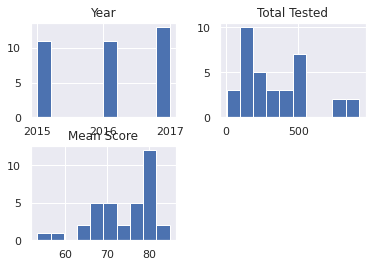

In [828]:
df_4a.hist()
#histograms for Francis Lewis High School.

In [829]:
#Now let's look at Long Island City High School or df_4b

In [830]:
df_4b.describe()
# Task 5 - Descriptive statistics for Long Island City High School

,Year,Total Tested,Mean Score
count,39.00000,39.000000,39.000000
mean,2016.00000,333.589744,61.756410
std,0.82717,274.057017,4.894132
min,2015.00000,13.000000,50.700000
25%,2015.00000,118.500000,58.050000
50%,2016.00000,279.000000,62.500000
75%,2017.00000,481.000000,65.300000
max,2017.00000,1061.000000,69.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6faab016d0>,
      dtype=object)

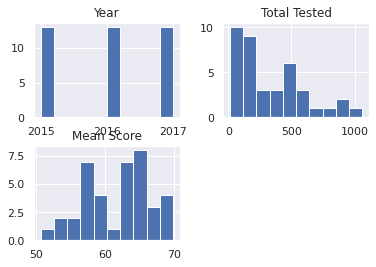

In [831]:
df_4b.hist()
##histograms for Long Island City High School

#Back to df4, 
#df4 is subsetted df3 further to only 2 School Names --- for 'Francis Lewis High School' and 'Long Island City High School'

In [832]:
df4

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
School DBN,,,,,,
26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,541,67.1
26Q430,Francis Lewis High School,High school,Common Core Algebra,2016,900,77.8
26Q430,Francis Lewis High School,High school,Common Core Algebra,2017,916,79.3
30Q450,Long Island City High School,High school,Common Core Algebra,2015,599,57.4
30Q450,Long Island City High School,High school,Common Core Algebra,2016,942,63.2
...,...,...,...,...,...,...
30Q450,Long Island City High School,High school,Common Core Algebra,2017,145,69.5
30Q450,Long Island City High School,High school,Common Core Algebra,2017,127,62.4
30Q450,Long Island City High School,High school,Common Core Algebra,2017,705,64.3


#Task #6

#I can drop School Level and Regents Exam columns now from df4, because they are all identical data. To help me focus better.

For Clarity, I will rename the "School Name" column title, to "High School" for clarity. Because all the data are for high school only for both schools.
For clarify, I will rename the "Total Tested" column title, to "Tot Students Tested in Common Core Algebra" for clarity. Because all data are for Common Core Algebra.
For clarify, I will rename the "Mean Score" column title, to "Mean Score in Common Core Algebra" for clarity. Because all data are for Common Core Algebra.

In [833]:
df4.drop('School Level', axis = 1, inplace = True)
#df4 has dropped school level column entirely

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [834]:
df4
#confirms entire School Level column was removed.

,School Name,Regents Exam,Year,Total Tested,Mean Score
School DBN,,,,,
26Q430,Francis Lewis High School,Common Core Algebra,2015,541,67.1
26Q430,Francis Lewis High School,Common Core Algebra,2016,900,77.8
26Q430,Francis Lewis High School,Common Core Algebra,2017,916,79.3
30Q450,Long Island City High School,Common Core Algebra,2015,599,57.4
30Q450,Long Island City High School,Common Core Algebra,2016,942,63.2
...,...,...,...,...,...
30Q450,Long Island City High School,Common Core Algebra,2017,145,69.5
30Q450,Long Island City High School,Common Core Algebra,2017,127,62.4
30Q450,Long Island City High School,Common Core Algebra,2017,705,64.3


In [835]:
df4.drop('Regents Exam', axis = 1, inplace = True)
#df4 has dropped Regents Exam column entirely

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [836]:
df4
#confirms entire Regents Exam column was removed.

,School Name,Year,Total Tested,Mean Score
School DBN,,,,
26Q430,Francis Lewis High School,2015,541,67.1
26Q430,Francis Lewis High School,2016,900,77.8
26Q430,Francis Lewis High School,2017,916,79.3
30Q450,Long Island City High School,2015,599,57.4
30Q450,Long Island City High School,2016,942,63.2
...,...,...,...,...
30Q450,Long Island City High School,2017,145,69.5
30Q450,Long Island City High School,2017,127,62.4
30Q450,Long Island City High School,2017,705,64.3


In [837]:
#For Clarity, I renamed the "School Name" column title, to "High School".  Because all the data are for high school only for both schools.

In [838]:
df4 = df4.rename(columns={'School Name' : 'High School'})


In [839]:
df4 
#to confirm column renamed

,High School,Year,Total Tested,Mean Score
School DBN,,,,
26Q430,Francis Lewis High School,2015,541,67.1
26Q430,Francis Lewis High School,2016,900,77.8
26Q430,Francis Lewis High School,2017,916,79.3
30Q450,Long Island City High School,2015,599,57.4
30Q450,Long Island City High School,2016,942,63.2
...,...,...,...,...
30Q450,Long Island City High School,2017,145,69.5
30Q450,Long Island City High School,2017,127,62.4
30Q450,Long Island City High School,2017,705,64.3


In [840]:
#For clarify, I will rename the "Total Tested" column title, to "Total Students Tested in Common Core Algebra".  Because all data are for Common Core Algebra.

In [841]:
df4 = df4.rename(columns={'Total Tested' : 'Tot Students Tested: CCA'})

In [842]:
df4
#df4 to confirm Total Tested column was renamed

,High School,Year,Tot Students Tested: CCA,Mean Score
School DBN,,,,
26Q430,Francis Lewis High School,2015,541,67.1
26Q430,Francis Lewis High School,2016,900,77.8
26Q430,Francis Lewis High School,2017,916,79.3
30Q450,Long Island City High School,2015,599,57.4
30Q450,Long Island City High School,2016,942,63.2
...,...,...,...,...
30Q450,Long Island City High School,2017,145,69.5
30Q450,Long Island City High School,2017,127,62.4
30Q450,Long Island City High School,2017,705,64.3


In [843]:
#For clarify, I will rename the "Mean Score" column title, to Mean Score in Common Core Algebra.  This is too long, so will rename 'Mean Score: CCA'.  Because all data are for Common Core Algebra.

In [844]:
df4 = df4.rename(columns={'Mean Score' : 'Mean Score: CCA'})

In [845]:
df4.info()
#confirming Mean Score: CCA, and other column renaminings were kept

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 26Q430 to 30Q450
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   High School               74 non-null     object 
 1   Year                      74 non-null     int64  
 2   Tot Students Tested: CCA  74 non-null     int64  
 3   Mean Score: CCA           74 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ KB


In [846]:
df4.columns

Index(['High School', 'Year', 'Tot Students Tested: CCA', 'Mean Score: CCA'], dtype='object')

#Indexing

In [847]:
df4.index = [np.arange(len(df4.index)), df4.index]
print (df4)
#Although dataset is much smaller as df4, it's still many columns for me.  I'd like to use indexing to make each row unique, to get a better look at the data

                                High School  Year  Tot Students Tested: CCA  \
   School DBN                                                                 
0  26Q430         Francis Lewis High School  2015                       541   
1  26Q430         Francis Lewis High School  2016                       900   
2  26Q430         Francis Lewis High School  2017                       916   
3  30Q450      Long Island City High School  2015                       599   
4  30Q450      Long Island City High School  2016                       942   
...                                     ...   ...                       ...   
69 30Q450      Long Island City High School  2017                       145   
70 30Q450      Long Island City High School  2017                       127   
71 30Q450      Long Island City High School  2017                       705   
72 30Q450      Long Island City High School  2017                        23   
73 30Q450      Long Island City High School  2017   

In [848]:
pd.options.display.max_rows = 999
#display up to 999 rows
#https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [849]:
df4

,,High School,Year,Tot Students Tested: CCA,Mean Score: CCA
,School DBN,,,,
0,26Q430,Francis Lewis High School,2015,541,67.1
1,26Q430,Francis Lewis High School,2016,900,77.8
2,26Q430,Francis Lewis High School,2017,916,79.3
3,30Q450,Long Island City High School,2015,599,57.4
4,30Q450,Long Island City High School,2016,942,63.2
5,30Q450,Long Island City High School,2017,1061,65.2
6,26Q430,Francis Lewis High School,2015,433,70.5
7,26Q430,Francis Lewis High School,2015,108,53.3
8,26Q430,Francis Lewis High School,2016,745,80.2


In [851]:
#I did a manual review of the above and found no duplicate data

#Task #5:

#descriptive stats of Total Students Tested in Common Core Algebra - for both Francis Lewis and Long Island City High schools together 
#Ignore Year stats which are not useful

In [852]:
df4.describe()
#descriptive statistics for both

,Year,Tot Students Tested: CCA,Mean Score: CCA
count,74.000000,74.000000,74.000000
mean,2016.027027,333.662162,67.522973
std,0.827158,255.035924,8.628299
min,2015.000000,6.000000,50.700000
25%,2015.000000,130.750000,61.200000
50%,2016.000000,274.500000,66.050000
75%,2017.000000,489.750000,76.350000
max,2017.000000,1061.000000,84.800000


In [853]:
df4['Tot Students Tested: CCA'].value_counts()
#count of values for both high schools combined

491     2
490     2
108     2
60      2
279     2
541     1
301     1
129     1
217     1
80      1
120     1
504     1
557     1
469     1
473     1
320     1
425     1
518     1
202     1
290     1
133     1
23      1
705     1
127     1
145     1
15      1
580     1
154     1
6       1
42      1
13      1
366     1
84      1
94      1
130     1
409     1
424     1
251     1
900     1
916     1
599     1
942     1
1061    1
433     1
745     1
155     1
748     1
168     1
489     1
110     1
773     1
169     1
866     1
195     1
282     1
151     1
182     1
228     1
178     1
468     1
270     1
106     1
214     1
161     1
437     1
344     1
170     1
467     1
61      1
Name: Tot Students Tested: CCA, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6faa9b86d0>,
      dtype=object)

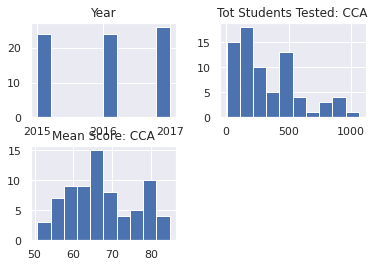

In [854]:
df4.hist()
#histogram for both high schools combined

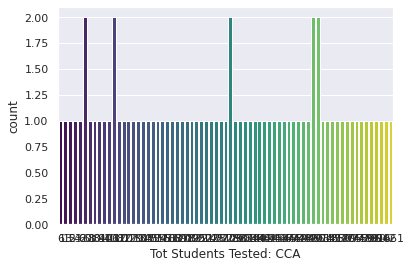

In [855]:
sns.countplot(x='Tot Students Tested: CCA',data=df4, palette='viridis')
#create a boxplot of the Reason data using the viridis palette colors for both high schools combined
#nice colors but too much data

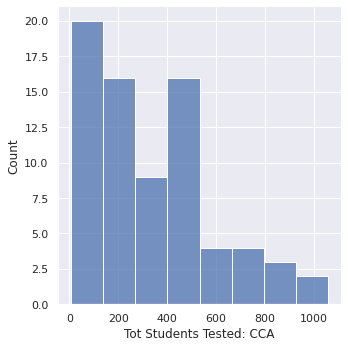

In [856]:
sns.displot(df4['Tot Students Tested: CCA'])
#general grid showing counts of total students tested data for both schools

In [857]:
#Mean Score: CCA

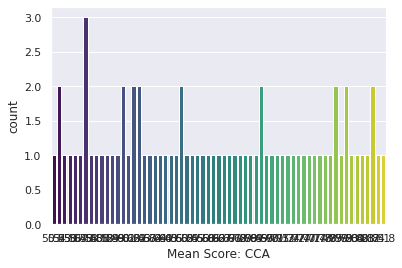

In [858]:
sns.countplot(x='Mean Score: CCA',data=df4, palette='viridis')
#create a boxplot of the Reason data using the viridis palette colors for both schools
#nice colors but too much data

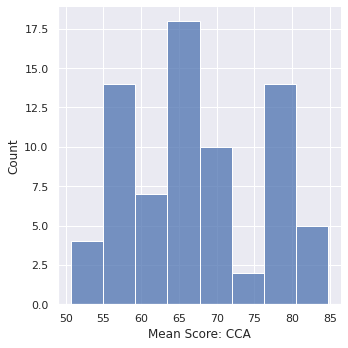

In [859]:
sns.displot(df4['Mean Score: CCA'])
#general grid showing counts of Mean Score: CCA data for both schools

In [860]:
df_4a = df4.filter(like='26Q430', axis=0)
#filter an index in python for Francis Lewis High School

In [861]:
df_4a
#Francis Lewis High School

,,High School,Year,Tot Students Tested: CCA,Mean Score: CCA
,School DBN,,,,
0,26Q430,Francis Lewis High School,2015,541,67.1
1,26Q430,Francis Lewis High School,2016,900,77.8
2,26Q430,Francis Lewis High School,2017,916,79.3
6,26Q430,Francis Lewis High School,2015,433,70.5
7,26Q430,Francis Lewis High School,2015,108,53.3
8,26Q430,Francis Lewis High School,2016,745,80.2
9,26Q430,Francis Lewis High School,2016,155,66.2
10,26Q430,Francis Lewis High School,2017,748,81.5
11,26Q430,Francis Lewis High School,2017,168,69.9


In [862]:
df_4a.value_counts()
#counts of Francis Lewis High School.  As you can see, there are multiple data rows for years

High School                Year  Tot Students Tested: CCA  Mean Score: CCA
Francis Lewis High School  2015  80                        63.9               1
                           2017  178                       79.2               1
                           2016  745                       80.2               1
                                 900                       77.8               1
                           2017  6                         84.8               1
                                 60                        71.3               1
                                 130                       79.3               1
                                 168                       69.9               1
                                 202                       74.4               1
                           2016  490                       81.5               1
                           2017  270                       80.7               1
                                 425         

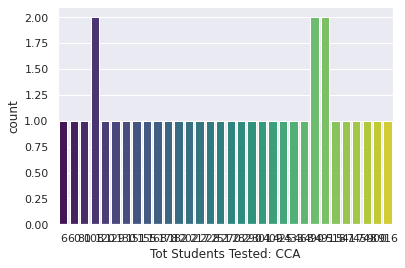

In [863]:
sns.countplot(x='Tot Students Tested: CCA',data=df_4a, palette='viridis')
#create a boxplot of the data using the viridis palette colors for Francis Lewis High School
#nice colors but still not helpful

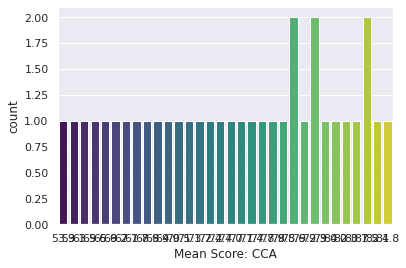

In [864]:
sns.countplot(x='Mean Score: CCA',data=df_4a, palette='viridis')
#create a boxplot of the data using the viridis palette colors for Francis Lewis
#nice colors but still not helpful

In [865]:
df_4a.max()
#for Francis Lewis High

High School                 Francis Lewis High School
Year                                             2017
Tot Students Tested: CCA                          916
Mean Score: CCA                                  84.8
dtype: object

In [866]:
#the above graphs were not helpful for 1 school. So, I decided not to do the same graphs for the 2nd School Long Island City High School.

In [867]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 74 entries, (0, '26Q430') to (73, '30Q450')
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   High School               74 non-null     object 
 1   Year                      74 non-null     int64  
 2   Tot Students Tested: CCA  74 non-null     int64  
 3   Mean Score: CCA           74 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.3+ KB


#Task #7:

#Tables and Bar charts for Total Students Tested in Common Core Algebra - Francis Lewis and Long Island City High Schools

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6faa44b280>,
      dtype=object)

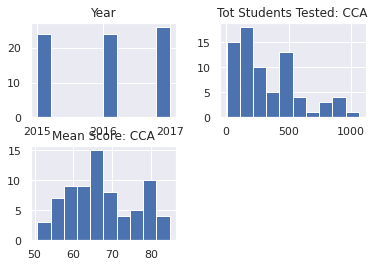

In [868]:
df4.hist()
#general histogram

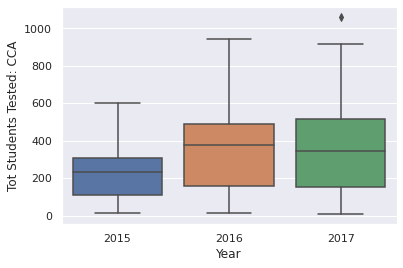

In [869]:
sns.boxplot(x='Year', y='Tot Students Tested: CCA', data= df4)
#boxplot of both schools combined for Total Students Tested: CCA by Year

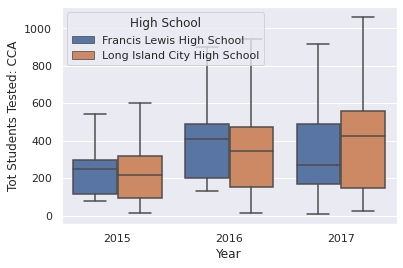

In [870]:
sns.boxplot(x='Year', y='Tot Students Tested: CCA', data= df4, hue='High School')
#more granular boxplot of same but more granular, separately each of 2 schools data as color coded

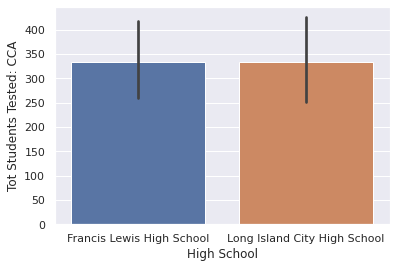

In [871]:
sns.barplot(x='High School', y='Tot Students Tested: CCA', data=df4)
#categorical data comparing total students tested: CCA between the 2 schools

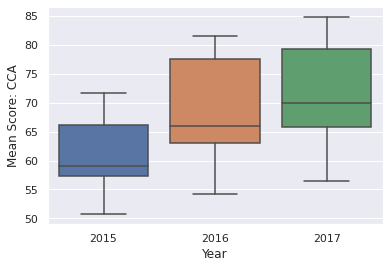

In [872]:
sns.boxplot(x='Year', y='Mean Score: CCA', data= df4)
#boxplot of both schools combined for Mean Score: CCA by Year

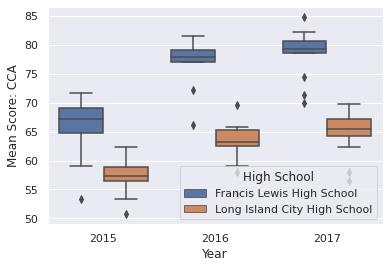

In [873]:
sns.boxplot(x='Year', y='Mean Score: CCA', data= df4, hue='High School')
#more granular boxplot of same but more granular, separately each of 2 schools data as color coded

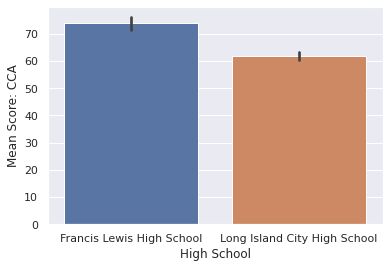

In [874]:
sns.barplot(x='High School', y='Mean Score: CCA', data=df4)
#categorical data comparing Mean Score: CCA between the 2 schools

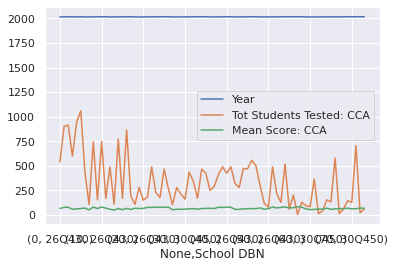

In [875]:
df4.plot()
#general graphing of the data for the 2 schools

In [876]:
#This table below is drawn to compare the Total Tested data within each of the 2 high schools, to first look within each high school.
#For Francis Lewis HS in Common Core Algebra, what were the Total Tested for 2015, 2016 and 2017? 
#For Long Island City HS in Common Core Algebra, what were the Total Tested for 2015, 2016 and 2017?  

#Total Students Tested: CCA

In [877]:
df4.groupby(['High School', 'Year'])['Tot Students Tested: CCA'].sum()
#1
#This table is drawn to compare, 
# Totals of Total Students Tested in Common Core Algebra, 
# within each high school.
# 
#For Francis Lewis HS in Common Core Algebra, what were the Total Students Tested for 2015, 2016 and 2017? 
#For Long Island City HS in Common Core Algebra, what were the Total Students Tested for 2015, 2016 and 2017?  

High School                   Year
Francis Lewis High School     2015    2665
                              2016    4436
                              2017    4580
Long Island City High School  2015    2995
                              2016    4710
                              2017    5305
Name: Tot Students Tested: CCA, dtype: int64

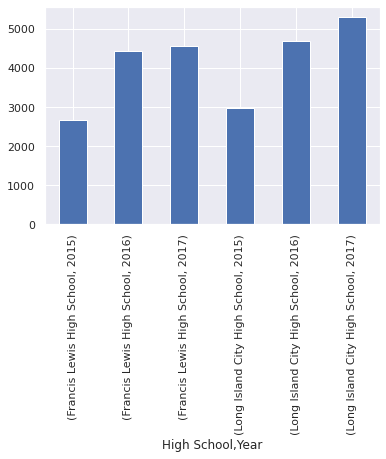

In [878]:
df4.groupby(['High School', 'Year'])['Tot Students Tested: CCA'].sum().plot(kind='bar')
#2
#Bar chart to compare, 
# Totals of Total Students Tested in Common Core Algebra, 
# within each high school.
# 
#For Francis Lewis HS in Common Core Algebra, what were the Total Students Tested for 2015, 2016 and 2017? 
#For Long Island City HS in Common Core Algebra, what were the Total Students Tested for 2015, 2016 and 2017?  

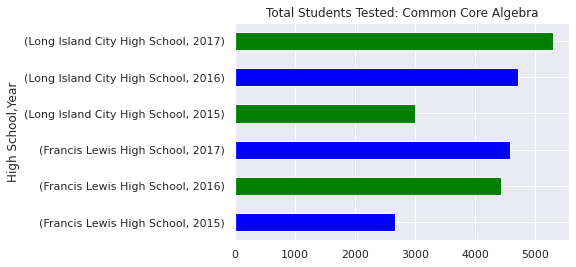

In [879]:
df4.groupby(['High School', 'Year'])['Tot Students Tested: CCA'].sum().plot(kind='barh' , title= 'Total Students Tested: Common Core Algebra' , color = ['blue' , 'green'])
#3
#Same Bar chart but other direction

In [880]:
df4.groupby(['High School', 'Year']).agg({'Tot Students Tested: CCA' : 'mean'})
#4
#This table is drawn to compare, 
# Mean values of Total Students Tested in Common Core Algebra, 
# within each high school.
# 
#For Francis Lewis HS in Common Core Algebra, what were the Total Students Tested for 2015, 2016 and 2017? 
#For Long Island City HS in Common Core Algebra, what were the Total Students Tested for 2015, 2016 and 2017?  

Tot Students Tested: CCA
High School                  Year                          
Francis Lewis High School    2015                242.272727
                             2016                403.272727
                             2017                352.307692
Long Island City High School 2015                230.384615
                             2016                362.307692
                             2017                408.076923

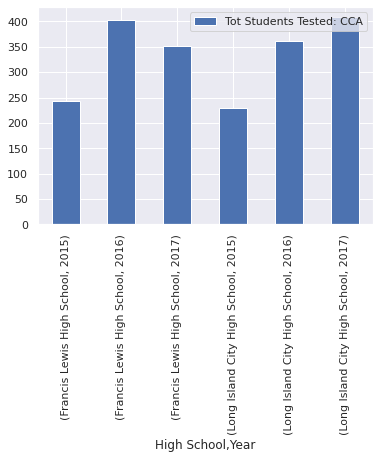

In [881]:
df4.groupby(['High School', 'Year']).agg({'Tot Students Tested: CCA' : 'mean'}).plot(kind='bar')
#5
#Bar chart to compare:
# Mean values of Total Students Tested in Common Core Algebra, 

#within each of the 2 high schools, to first look within each high school.
#For Francis Lewis HS in Common Core Algebra, what were the Total Students Tested for 2015, 2016 and 2017? 
#For Long Island City HS in Common Core Algebra, what were the Total Students Tested for 2015, 2016 and 2017?  

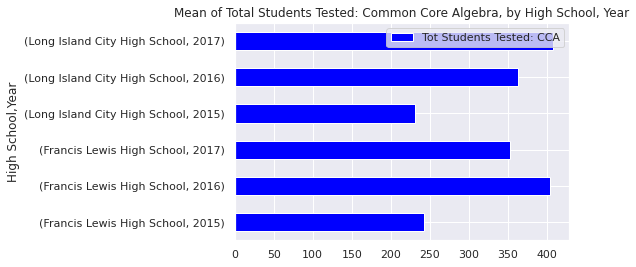

In [882]:
df4.groupby(['High School', 'Year']).agg({'Tot Students Tested: CCA' : 'mean'}).plot(kind='barh' , title= 'Mean of Total Students Tested: Common Core Algebra, by High School, Year' , color = ['blue' , 'green'])
#6
#Same Bar chart but other direction

In [883]:
df4.groupby(['Year', 'High School']).agg({'Tot Students Tested: CCA' : 'mean'})
#7
#This table is drawn to compare, 
# Mean values of Total Students Tested in Common Core Algebra, 
# Comparing both high Schools by Year.
#
# For 2015, how do data compare between Francis Lewis and Long Island City HS's?
# For 2016, how do data compare between Francis Lewis and Long Island City HS's?
# For 2017, how do data compare between Francis Lewis and Long Island City HS's?

Tot Students Tested: CCA
Year High School                                           
2015 Francis Lewis High School                   242.272727
     Long Island City High School                230.384615
2016 Francis Lewis High School                   403.272727
     Long Island City High School                362.307692
2017 Francis Lewis High School                   352.307692
     Long Island City High School                408.076923

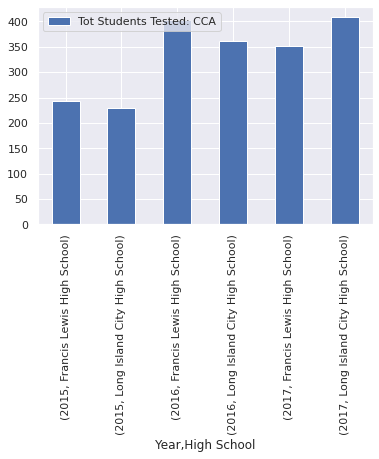

In [884]:
df4.groupby(['Year', 'High School']).agg({'Tot Students Tested: CCA' : 'mean'}).plot(kind='bar')
#8
#Bar chart to compare, 
# Mean values of Total Students Tested in Common Core Algebra, 
# Comparing both high Schools by Year.
#
# For 2015, how do data compare between Francis Lewis and Long Island City HS's?
# For 2016, how do data compare between Francis Lewis and Long Island City HS's?
# For 2017, how do data compare between Francis Lewis and Long Island City HS's?

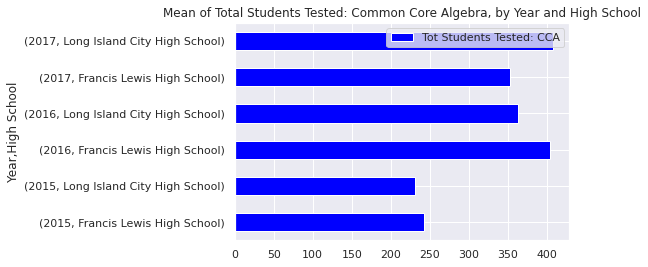

In [885]:
df4.groupby(['Year', 'High School']).agg({'Tot Students Tested: CCA' : 'mean'}).plot(kind='barh' , title= 'Mean of Total Students Tested: Common Core Algebra, by Year and High School' , color = ['blue' , 'green'])
#9
#Same Bar chart but other direction

In [886]:
#Mean Score: CCA

In [887]:
df4.groupby(['High School', 'Year'])['Mean Score: CCA'].sum()
#1
#This table is drawn to compare, 
# Mean Score in Common Core Algebra, 
# within each high school.
# 
#For Francis Lewis HS in Common Core Algebra, what were the Mean Scores for 2015, 2016 and 2017? 
#For Long Island City HS in Common Core Algebra, what were the Mean Scores for 2015, 2016 and 2017?  

High School                   Year
Francis Lewis High School     2015     723.0
                              2016     845.3
                              2017    1019.9
Long Island City High School  2015     745.4
                              2016     816.8
                              2017     846.3
Name: Mean Score: CCA, dtype: float64

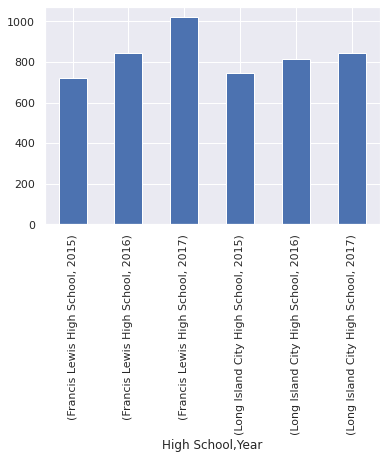

In [888]:
df4.groupby(['High School', 'Year'])['Mean Score: CCA'].sum().plot(kind='bar')
#2
#Bar chart to compare, 
# Mean Score in Common Core Algebra, 
# within each high school.
# 
#For Francis Lewis HS in Common Core Algebra, what were the Mean Scores for 2015, 2016 and 2017? 
#For Long Island City HS in Common Core Algebra, what were the Mean Scores for 2015, 2016 and 2017?  

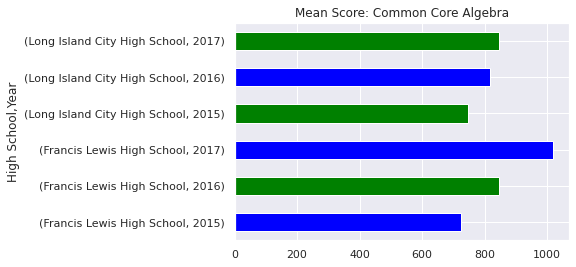

In [889]:
df4.groupby(['High School', 'Year'])['Mean Score: CCA'].sum().plot(kind='barh' , title= 'Mean Score: Common Core Algebra' , color = ['blue' , 'green'])
#3
#Same Bar chart but other direction

In [890]:
df4.groupby(['High School', 'Year']).agg({'Mean Score: CCA' : 'mean'})
#4
#This table is drawn to compare, 
# Mean values of Mean Score in Common Core Algebra, 
# within each high school.
# 
#For Francis Lewis HS in Common Core Algebra, what were the Mean Scores for 2015, 2016 and 2017? 
#For Long Island City HS in Common Core Algebra, what were the Mean Scores for 2015, 2016 and 2017?  

Mean Score: CCA
High School                  Year                 
Francis Lewis High School    2015        65.727273
                             2016        76.845455
                             2017        78.453846
Long Island City High School 2015        57.338462
                             2016        62.830769
                             2017        65.100000

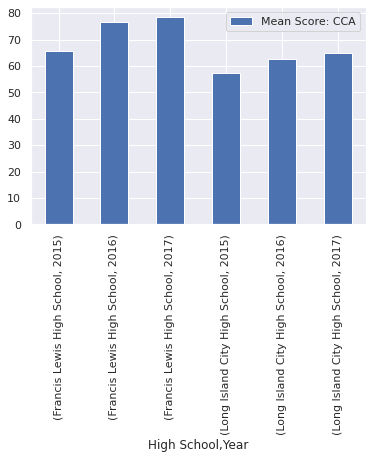

In [891]:
df4.groupby(['High School', 'Year']).agg({'Mean Score: CCA' : 'mean'}).plot(kind='bar')
#5
#Bar chart to compare:
# Mean values of Mean Score in Common Core Algebra, 

#within each of the 2 high schools, to first look within each high school.
#For Francis Lewis HS in Common Core Algebra, what were the Mean Scores for 2015, 2016 and 2017? 
#For Long Island City HS in Common Core Algebra, what were the Mean Scores for 2015, 2016 and 2017?  

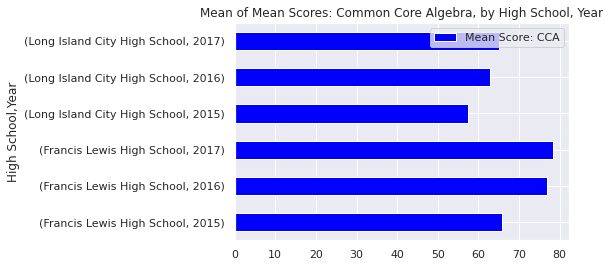

In [892]:
df4.groupby(['High School', 'Year']).agg({'Mean Score: CCA' : 'mean'}).plot(kind='barh' , title= 'Mean of Mean Scores: Common Core Algebra, by High School, Year' , color = ['blue' , 'green'])
#6
#Same Bar chart but other direction

In [893]:

df4.groupby(['Year', 'High School']).agg({'Mean Score: CCA' : 'mean'})
#7
#This table is drawn to compare, 
# Mean values of Mean Scores in Common Core Algebra, 
# Comparing both high Schools by Year.
#
# For 2015, how do data compare between Francis Lewis and Long Island City HS's?
# For 2016, how do data compare between Francis Lewis and Long Island City HS's?
# For 2017, how do data compare between Francis Lewis and Long Island City HS's?

Mean Score: CCA
Year High School                                  
2015 Francis Lewis High School           65.727273
     Long Island City High School        57.338462
2016 Francis Lewis High School           76.845455
     Long Island City High School        62.830769
2017 Francis Lewis High School           78.453846
     Long Island City High School        65.100000

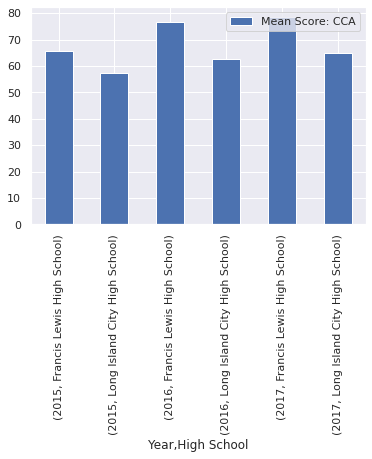

In [894]:
df4.groupby(['Year', 'High School']).agg({'Mean Score: CCA' : 'mean'}).plot(kind='bar')
#8
#Bar chart to compare, 
# Mean values of Mean Scores in Common Core Algebra, 
# Comparing both high Schools by Year.
#
# For 2015, how do data compare between Francis Lewis and Long Island City HS's?
# For 2016, how do data compare between Francis Lewis and Long Island City HS's?
# For 2017, how do data compare between Francis Lewis and Long Island City HS's?

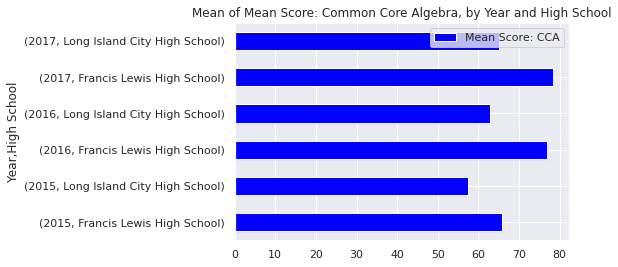

In [895]:
df4.groupby(['Year', 'High School']).agg({'Mean Score: CCA' : 'mean'}).plot(kind='barh' , title= 'Mean of Mean Score: Common Core Algebra, by Year and High School' , color = ['blue' , 'green'])
#9
#Same Bar chart but other direction

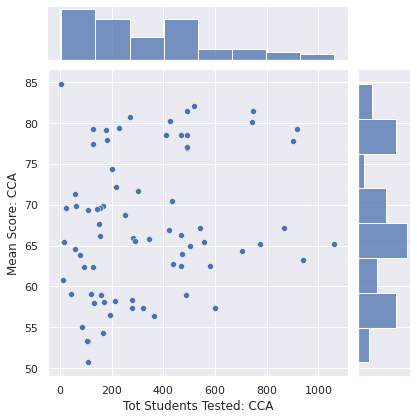

In [896]:
sns.jointplot(x = 'Tot Students Tested: CCA', y = 'Mean Score: CCA', data = df4)
#Distribution plot

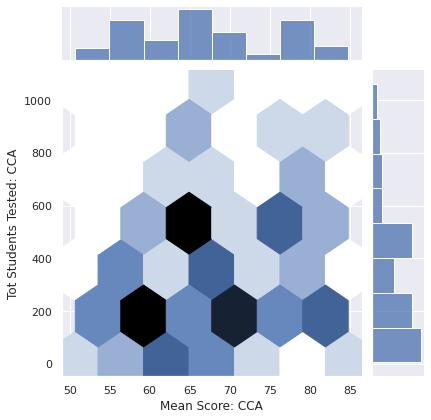

In [897]:
sns.jointplot(x = 'Mean Score: CCA', y = 'Tot Students Tested: CCA', data = df4, kind = 'hex')
#Distribution plot with the reverse

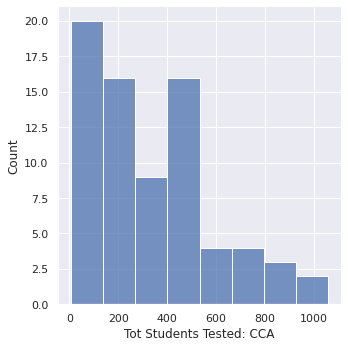

In [898]:
sns.displot(df4['Tot Students Tested: CCA'])
#distribution plot

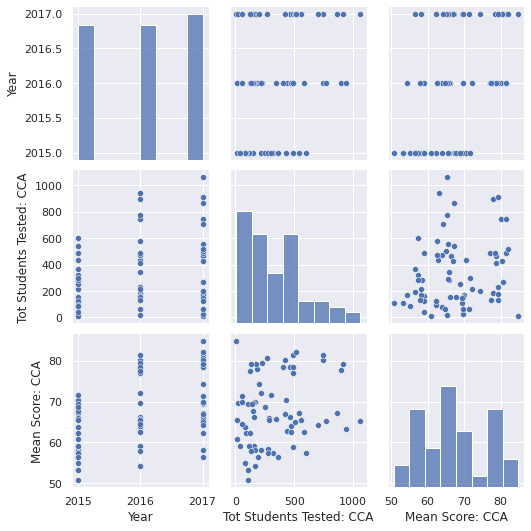

In [899]:
sns.pairplot(df4)
#distribution plots

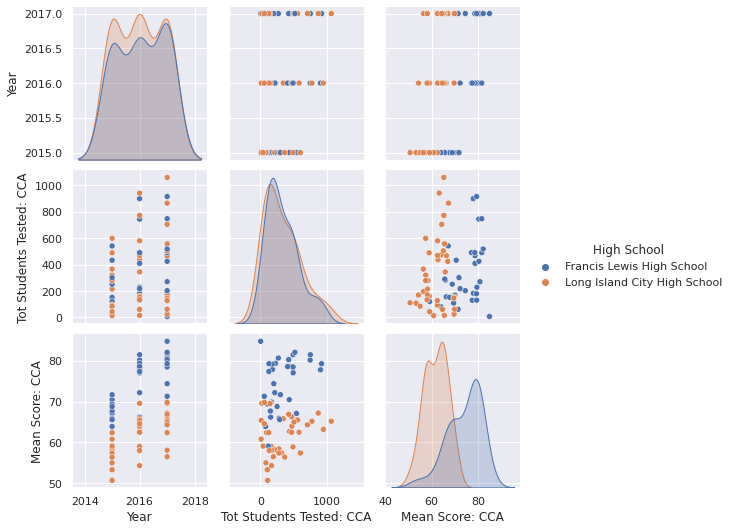

In [900]:
sns.pairplot(df4, hue = 'High School')
#distribution plot of the 2 schools is clearer with hue

#Task #8:

##Conclusion statements

#1. In comparing Both Francis Lewis and Long Island City High Schools performance, both had increases with each coming year...
#...in Mean Total Students Tested and Mean Score, in Common Core Algebra for the Regents Exam, from 2015, 2016, to 2017.

#2. Francis Lewis High School had better performance, with greater values than Long Island City High School in both Mean Total Students Tested and Mean Scores in Common Core Algebra in the 2015 year, in the 2016 year, and in the 2017 year.

#3. See further below.

In [901]:
df4.groupby(['Year', 'High School']).agg({'Tot Students Tested: CCA' : 'mean'})
#7
#This table is drawn to compare, 
# Mean values of Total Students Tested in Common Core Algebra, 
# Comparing both high Schools by Year.
#
# For 2015, how do data compare between Francis Lewis and Long Island City HS's?
# For 2016, how do data compare between Francis Lewis and Long Island City HS's?
# For 2017, how do data compare between Francis Lewis and Long Island City HS's?

Tot Students Tested: CCA
Year High School                                           
2015 Francis Lewis High School                   242.272727
     Long Island City High School                230.384615
2016 Francis Lewis High School                   403.272727
     Long Island City High School                362.307692
2017 Francis Lewis High School                   352.307692
     Long Island City High School                408.076923

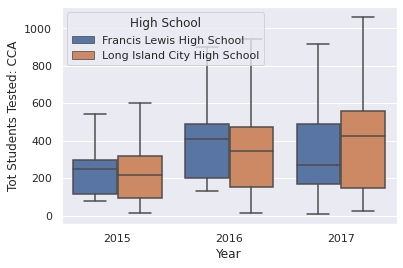

In [902]:
sns.boxplot(x='Year', y='Tot Students Tested: CCA', data= df4, hue='High School')
#more granular boxplot of same but more granular, separately each of 2 schools data as color coded

In [903]:
df4.groupby(['Year', 'High School']).agg({'Mean Score: CCA' : 'mean'})
#7
#This table is drawn to compare, 
# Mean values of Mean Scores in Common Core Algebra, 
# Comparing both high Schools by Year.
#
# For 2015, how do data compare between Francis Lewis and Long Island City HS's?
# For 2016, how do data compare between Francis Lewis and Long Island City HS's?
# For 2017, how do data compare between Francis Lewis and Long Island City HS's?

Mean Score: CCA
Year High School                                  
2015 Francis Lewis High School           65.727273
     Long Island City High School        57.338462
2016 Francis Lewis High School           76.845455
     Long Island City High School        62.830769
2017 Francis Lewis High School           78.453846
     Long Island City High School        65.100000

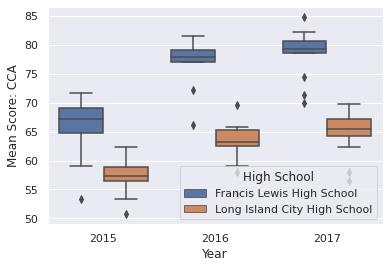

In [904]:
sns.boxplot(x='Year', y='Mean Score: CCA', data= df4, hue='High School')
#more granular boxplot of same but more granular, separately each of 2 schools data as color coded

#The Project 1 requirements are I think fulfilled with the analyses for statements 1 and 2. 

#Statement 3 was based on extra analyses found below

# #3. Francis Lewis High School had better performance with grades than Long Island City High school, with fewer mean scores below 65, with more mean scores between 65 to 80, and greatest mean scores over 80.

#Extra Analyses

In [905]:
#create df5 based on the original df dataset

In [906]:
df5 = df[df['Regents Exam'] == 'Common Core Algebra']

In [907]:
df5

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1.0,2.0,48.0,98.0,23.0,46.9,48,98
01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0,9.0,17.6,42.0,82.4,33.0,64.7,40,78.4
01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8,0.0,0.0,51.0,100.0,44.0,86.3,50,98
01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9,14.0,60.9,9.0,39.1,0.0,0.0,2,8.7
01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2016,22,69.0,6.0,27.3,16.0,72.7,2.0,9.1,15,68.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84X706,Harriet Tubman Charter School,K-8,Common Core Algebra,2017,15,82.6,0.0,0.0,15.0,100.0,12.0,80.0,15,100
84X717,Icahn Charter School,K-8,Common Core Algebra,2016,8,87.9,0.0,0.0,8.0,100.0,7.0,87.5,8,100
84X717,Icahn Charter School,K-8,Common Core Algebra,2016,6,87.2,0.0,0.0,6.0,100.0,6.0,100.0,6,100


In [908]:
df6 = df5.loc[(df5['School Name'] == 'Francis Lewis High School') | (df5['School Name'] == 'Long Island City High School')]
#used the | operator for multiple values filtered, which are Francis Lewis High School and Long Island City High School.
#did internet search of Stack Overflow source: https://stackoverflow.com/questions/67928643/filter-a-column-by-multiple-val

In [909]:
df6

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,541,67.1,181.0,33.5,360.0,66.5,58.0,10.7,266,49.2
26Q430,Francis Lewis High School,High school,Common Core Algebra,2016,900,77.8,90.0,10.0,810.0,90.0,478.0,53.1,744,82.7
26Q430,Francis Lewis High School,High school,Common Core Algebra,2017,916,79.3,70.0,7.6,846.0,92.4,533.0,58.2,796,86.9
30Q450,Long Island City High School,High school,Common Core Algebra,2015,599,57.4,423.0,70.6,176.0,29.4,2.0,0.3,63,10.5
30Q450,Long Island City High School,High school,Common Core Algebra,2016,942,63.2,443.0,47.0,499.0,53.0,49.0,5.2,310,32.9
30Q450,Long Island City High School,High school,Common Core Algebra,2017,1061,65.2,440.0,41.5,621.0,58.5,83.0,7.8,454,42.8
26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,433,70.5,93.0,21.5,340.0,78.5,58.0,13.4,261,60.3
26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,108,53.3,88.0,81.5,20.0,18.5,0.0,0.0,5,4.6
26Q430,Francis Lewis High School,High school,Common Core Algebra,2016,745,80.2,28.0,3.8,717.0,96.2,451.0,60.5,682,91.5


In [910]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 26Q430 to 30Q450
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School Name                  74 non-null     object 
 1   School Level                 74 non-null     object 
 2   Regents Exam                 74 non-null     object 
 3   Year                         74 non-null     int64  
 4   Total Tested                 74 non-null     int64  
 5   Mean Score                   74 non-null     float64
 6   Number Scoring Below 65      74 non-null     float64
 7   Percent Scoring Below 65     74 non-null     float64
 8   Number Scoring 65 or Above   74 non-null     float64
 9   Percent Scoring 65 or Above  74 non-null     float64
 10  Number Scoring 80 or Above   74 non-null     float64
 11  Percent Scoring 80 or Above  74 non-null     float64
 12  Number Scoring CR            74 non-null     object 
 13  Percent Scoring CR

In [911]:
#The data has: 
   # column for scores below 65.
    #column for scores 80 and above.

#This datasets does not have and needs: 
    # a column for scores beetween 65 and 80.  

#All it has is a column for scores 65 and above.
#So, to get scores between 65 and 80, 
# we need to subtract the column for scores 80 and above, from teh column for scores 65 and above.

In [912]:
df6['Number Scoring 65 to 80'] = df6['Number Scoring 65 or Above'] - df6['Number Scoring 80 or Above']
#create new column 'Number Scoring 65 to 80'

<ipython-input-912-be323e33db6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Number Scoring 65 to 80'] = df6['Number Scoring 65 or Above'] - df6['Number Scoring 80 or Above']


In [913]:
df6

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,Number Scoring 65 to 80
School DBN,,,,,,,,,,,,,,,
26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,541,67.1,181.0,33.5,360.0,66.5,58.0,10.7,266,49.2,302.0
26Q430,Francis Lewis High School,High school,Common Core Algebra,2016,900,77.8,90.0,10.0,810.0,90.0,478.0,53.1,744,82.7,332.0
26Q430,Francis Lewis High School,High school,Common Core Algebra,2017,916,79.3,70.0,7.6,846.0,92.4,533.0,58.2,796,86.9,313.0
30Q450,Long Island City High School,High school,Common Core Algebra,2015,599,57.4,423.0,70.6,176.0,29.4,2.0,0.3,63,10.5,174.0
30Q450,Long Island City High School,High school,Common Core Algebra,2016,942,63.2,443.0,47.0,499.0,53.0,49.0,5.2,310,32.9,450.0
30Q450,Long Island City High School,High school,Common Core Algebra,2017,1061,65.2,440.0,41.5,621.0,58.5,83.0,7.8,454,42.8,538.0
26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,433,70.5,93.0,21.5,340.0,78.5,58.0,13.4,261,60.3,282.0
26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,108,53.3,88.0,81.5,20.0,18.5,0.0,0.0,5,4.6,20.0
26Q430,Francis Lewis High School,High school,Common Core Algebra,2016,745,80.2,28.0,3.8,717.0,96.2,451.0,60.5,682,91.5,266.0


In [914]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 26Q430 to 30Q450
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School Name                  74 non-null     object 
 1   School Level                 74 non-null     object 
 2   Regents Exam                 74 non-null     object 
 3   Year                         74 non-null     int64  
 4   Total Tested                 74 non-null     int64  
 5   Mean Score                   74 non-null     float64
 6   Number Scoring Below 65      74 non-null     float64
 7   Percent Scoring Below 65     74 non-null     float64
 8   Number Scoring 65 or Above   74 non-null     float64
 9   Percent Scoring 65 or Above  74 non-null     float64
 10  Number Scoring 80 or Above   74 non-null     float64
 11  Percent Scoring 80 or Above  74 non-null     float64
 12  Number Scoring CR            74 non-null     object 
 13  Percent Scoring CR

In [915]:
df6.columns

Index(['School Name', 'School Level', 'Regents Exam', 'Year', 'Total Tested',
       'Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65',
       'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
       'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
       'Number Scoring CR', 'Percent Scoring CR', 'Number Scoring 65 to 80'],
      dtype='object')

#I can drop School Level, Regents Exam, Number Scoring CR, Number Scoring 65 and Above, and Percent Scoring, and CR columns now from df6, 
#because they are all identical data. To help me focus better

In [916]:
df6.drop('School Level', axis = 1, inplace = True)
#df6 has dropped school level column entirely

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [917]:
df6.columns

Index(['School Name', 'Regents Exam', 'Year', 'Total Tested', 'Mean Score',
       'Number Scoring Below 65', 'Percent Scoring Below 65',
       'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
       'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
       'Number Scoring CR', 'Percent Scoring CR', 'Number Scoring 65 to 80'],
      dtype='object')

In [918]:
df6.drop('Regents Exam', axis = 1, inplace = True)
#df6 has dropped Regents Exam column entirely

In [919]:
df6.drop('Number Scoring 65 or Above', axis = 1, inplace = True)
#df6 has dropped school level column entirely

In [920]:
df6.drop('Percent Scoring Below 65', axis = 1, inplace = True)

In [921]:
df6.drop('Percent Scoring 65 or Above', axis = 1, inplace = True)

In [922]:
df6.drop('Percent Scoring 80 or Above', axis = 1, inplace = True)

In [923]:
df6.drop('Number Scoring CR', axis = 1, inplace = True)
#df6 has dropped Regents Exam column entirely

In [924]:
df6.drop('Percent Scoring CR', axis = 1, inplace = True)
#df6 has dropped Regents Exam column entirely

In [925]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 26Q430 to 30Q450
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   School Name                 74 non-null     object 
 1   Year                        74 non-null     int64  
 2   Total Tested                74 non-null     int64  
 3   Mean Score                  74 non-null     float64
 4   Number Scoring Below 65     74 non-null     float64
 5   Number Scoring 80 or Above  74 non-null     float64
 6   Number Scoring 65 to 80     74 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 4.6+ KB


In [926]:
df6.shape

(74, 7)

In [927]:
df6.columns

Index(['School Name', 'Year', 'Total Tested', 'Mean Score',
       'Number Scoring Below 65', 'Number Scoring 80 or Above',
       'Number Scoring 65 to 80'],
      dtype='object')

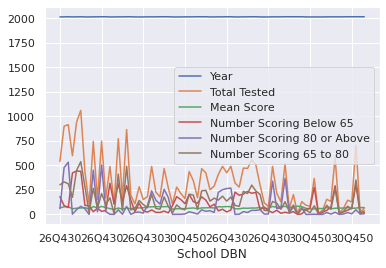

In [928]:
df6.plot()
#plot for both Francis Lewis and Long Island City Schools combined in Common Core Algebra

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fa8f3f490>,
      dtype=object)

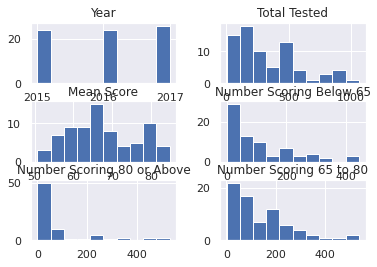

In [929]:
df6.hist()
#histogram showing combined performance for both Francis Lewis and Long Island City Schools combined in Common Core Algebra

In [930]:
df_6a = df6.filter(like='26Q430', axis=0)
#Francis Lewis High School only

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fa8de3250>,
      dtype=object)

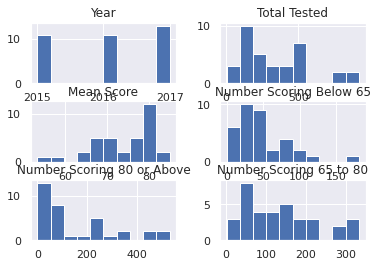

In [931]:
df_6a.hist()
#histograms of only Francis Lewis

In [932]:
df_6a.describe()
#descriptive statistics of only Francis Lewis High School

,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 80 or Above,Number Scoring 65 to 80
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2016.057143,333.742857,73.948571,47.628571,152.285714,133.828571
std,0.838165,236.026337,7.240628,37.218817,161.913843,88.709866
min,2015.000000,6.000000,53.300000,0.000000,0.000000,1.000000
25%,2015.000000,153.000000,69.100000,22.500000,25.500000,60.000000
50%,2016.000000,270.000000,77.100000,37.000000,68.000000,129.000000
75%,2017.000000,490.000000,79.300000,66.000000,254.000000,182.000000
max,2017.000000,916.000000,84.800000,181.000000,533.000000,332.000000


In [933]:
df_6b = df6.filter(like='30Q450', axis = 0)
#Long Island City only data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fa8aea070>,
      dtype=object)

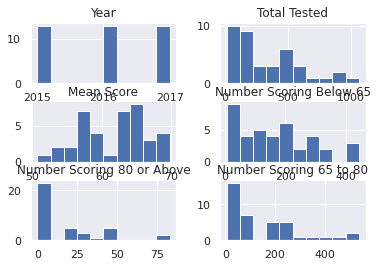

In [934]:
df_6b.hist()
#histograms of only Long Island City data

In [935]:
df_6b.describe()
#descriptive statistics of only Long Island City data

,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 80 or Above,Number Scoring 65 to 80
count,39.00000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,2016.00000,333.589744,61.756410,167.435897,17.179487,148.974359
std,0.82717,274.057017,4.894132,122.947313,22.532867,145.934284
min,2015.00000,13.000000,50.700000,6.000000,0.000000,5.000000
25%,2015.00000,118.500000,58.050000,65.000000,1.000000,42.000000
50%,2016.00000,279.000000,62.500000,147.000000,4.000000,88.000000
75%,2017.00000,481.000000,65.300000,231.500000,28.000000,237.500000
max,2017.00000,1061.000000,69.800000,443.000000,83.000000,538.000000


In [936]:
df_6a1 = df_6a.drop('Total Tested', axis = 1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


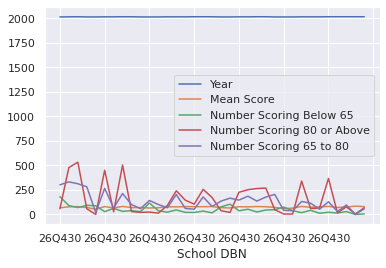

In [937]:
df_6a.plot()

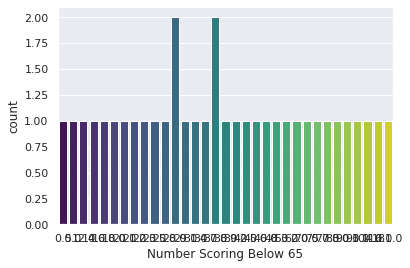

In [938]:
sns.countplot(x='Number Scoring Below 65',data=df_6a, palette='viridis')
#create a boxplot of the Reason data using the viridis palette colors
#nice colors but too much data

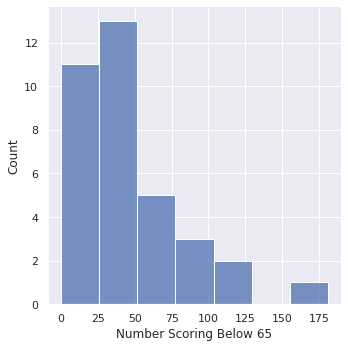

In [939]:
sns.displot(df_6a['Number Scoring Below 65'])
#general grid showing counts still not helpful

In [940]:
df_6a.columns

Index(['School Name', 'Year', 'Mean Score', 'Number Scoring Below 65',
       'Number Scoring 80 or Above', 'Number Scoring 65 to 80'],
      dtype='object')

In [941]:
df_6a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 26Q430 to 26Q430
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   School Name                 35 non-null     object 
 1   Year                        35 non-null     int64  
 2   Mean Score                  35 non-null     float64
 3   Number Scoring Below 65     35 non-null     float64
 4   Number Scoring 80 or Above  35 non-null     float64
 5   Number Scoring 65 to 80     35 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.0+ KB


In [942]:
#back to df6 which has both high schools data, to compare from

In [943]:
df6.index = [np.arange(len(df6.index)), df6.index]
print (df6)

                                School Name  Year  Total Tested  Mean Score  \
   School DBN                                                                 
0  26Q430         Francis Lewis High School  2015           541        67.1   
1  26Q430         Francis Lewis High School  2016           900        77.8   
2  26Q430         Francis Lewis High School  2017           916        79.3   
3  30Q450      Long Island City High School  2015           599        57.4   
4  30Q450      Long Island City High School  2016           942        63.2   
5  30Q450      Long Island City High School  2017          1061        65.2   
6  26Q430         Francis Lewis High School  2015           433        70.5   
7  26Q430         Francis Lewis High School  2015           108        53.3   
8  26Q430         Francis Lewis High School  2016           745        80.2   
9  26Q430         Francis Lewis High School  2016           155        66.2   
10 26Q430         Francis Lewis High School  2017   

In [944]:
df6.describe()
#descriptive statistics performance for both Francis Lewis and Long Island City Schools combined in Common Core Algebra

,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 80 or Above,Number Scoring 65 to 80
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,2016.027027,333.662162,67.522973,110.770270,81.081081,141.810811
std,0.827158,255.035924,8.628299,110.185217,130.717069,121.693043
min,2015.000000,6.000000,50.700000,0.000000,0.000000,1.000000
25%,2015.000000,130.750000,61.200000,28.250000,4.000000,51.250000
50%,2016.000000,274.500000,66.050000,68.000000,25.500000,98.500000
75%,2017.000000,489.750000,76.350000,172.250000,74.750000,205.500000
max,2017.000000,1061.000000,84.800000,443.000000,533.000000,538.000000


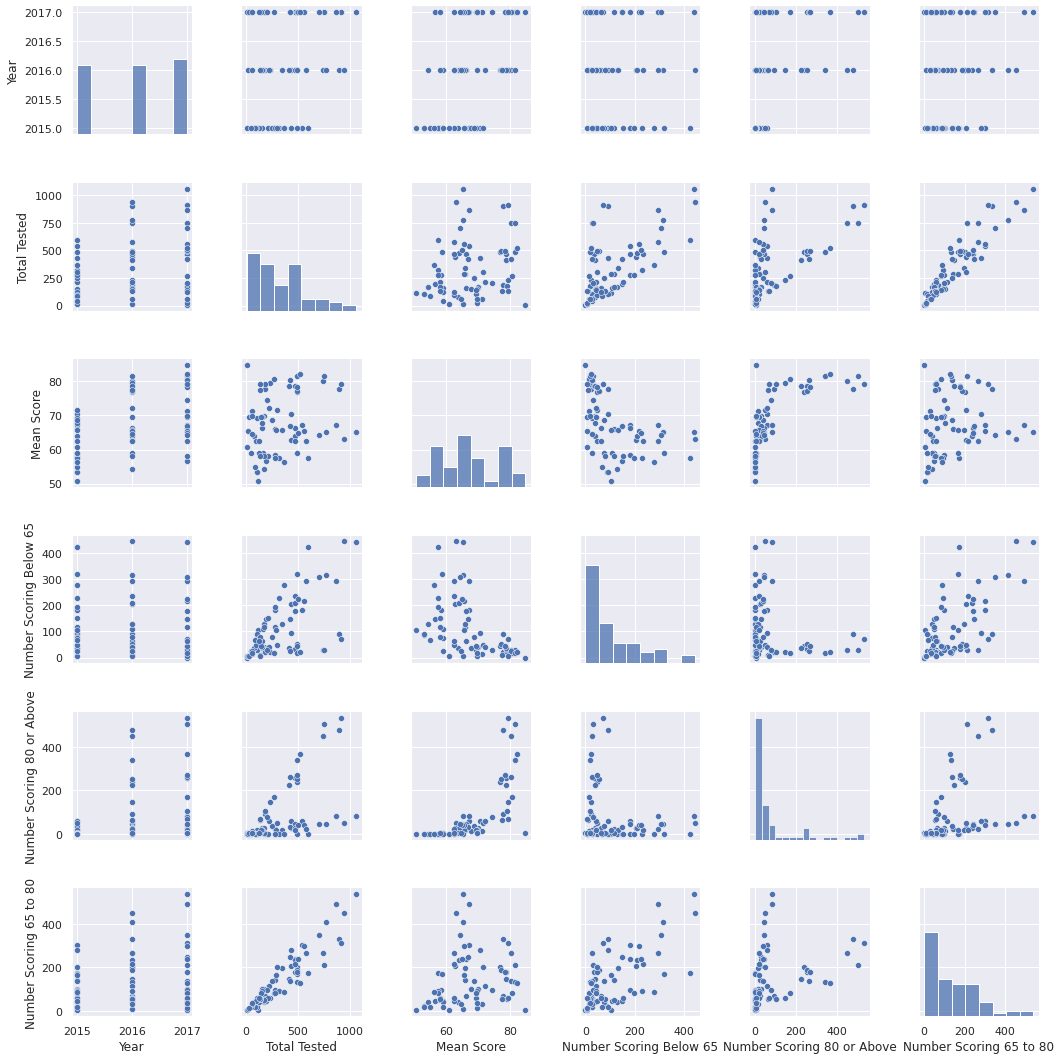

In [952]:
sns.pairplot(df6)
#lecture 7 distribution plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


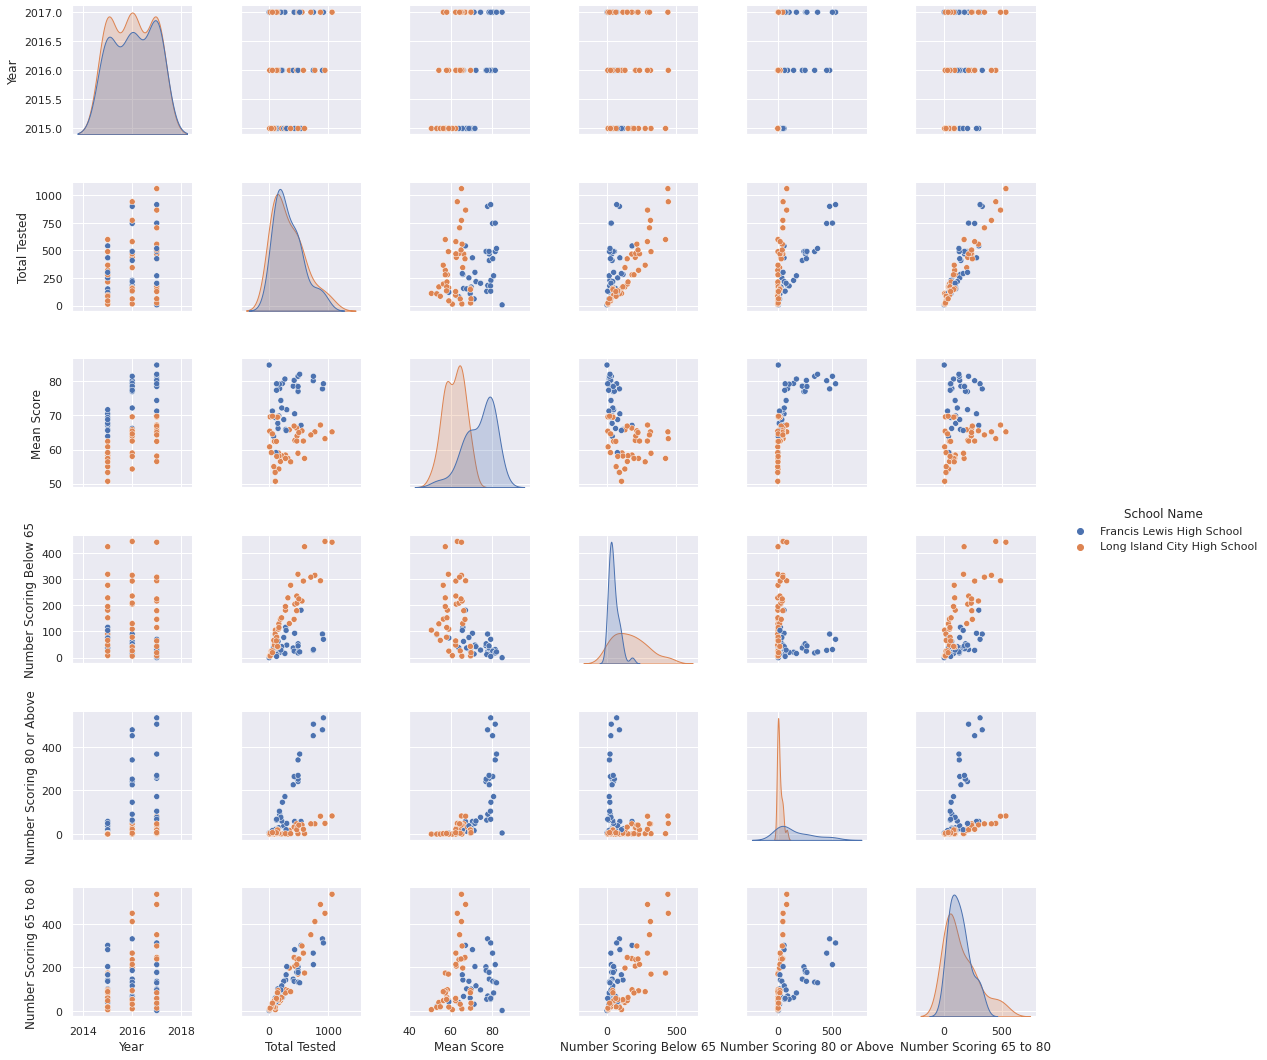

In [954]:
sns.pairplot(df6, 'School Name')
#same distribution plot lect 7 but separated by school

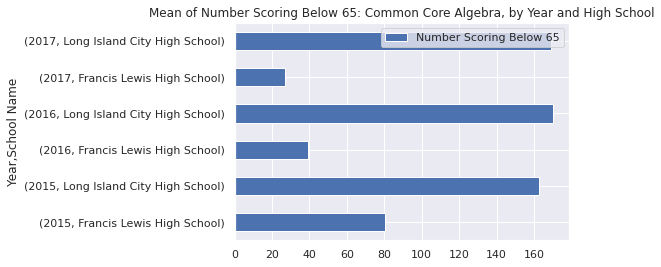

In [955]:
df6.groupby(['Year', 'School Name']).agg({'Number Scoring Below 65' : 'mean'}).plot(kind='barh' , title= 'Mean of Number Scoring Below 65: Common Core Algebra, by Year and High School')
#9
#Same Bar chart 

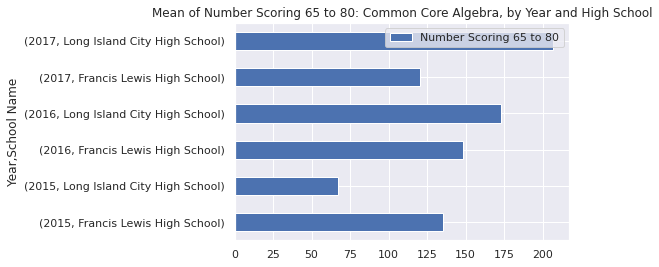

In [956]:
df6.groupby(['Year', 'School Name']).agg({'Number Scoring 65 to 80' : 'mean'}).plot(kind='barh' , title= 'Mean of Number Scoring 65 to 80: Common Core Algebra, by Year and High School')
#9
#Same Bar chart 

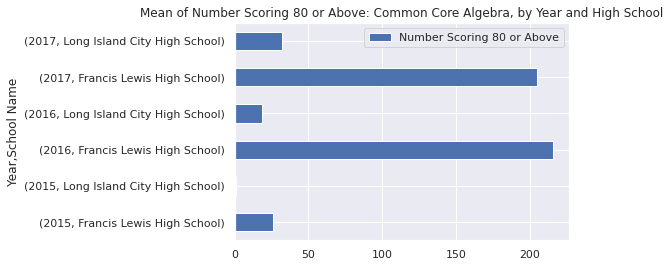

In [957]:
df6.groupby(['Year', 'School Name']).agg({'Number Scoring 80 or Above' : 'mean'}).plot(kind='barh' , title= 'Mean of Number Scoring 80 or Above: Common Core Algebra, by Year and High School')
#9
#Same Bar chart 

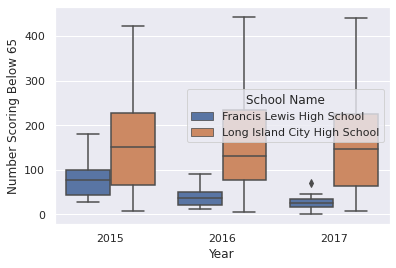

In [958]:
sns.boxplot(x='Year', y='Number Scoring Below 65', data= df6, hue='School Name')
#more granular boxplot of same but more granular, separately each of 2 schools data as color coded

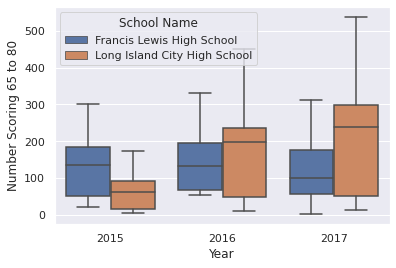

In [959]:
sns.boxplot(x='Year', y='Number Scoring 65 to 80', data= df6, hue='School Name')
#more granular boxplot of same but more granular, separately each of 2 schools data as color coded

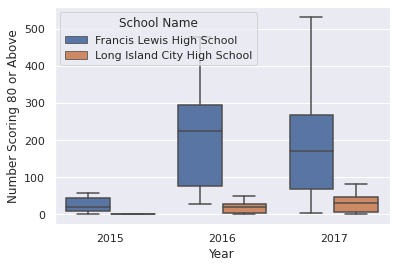

In [960]:
sns.boxplot(x='Year', y='Number Scoring 80 or Above', data= df6, hue='School Name')
#more granular boxplot of same but more granular, separately each of 2 schools data as color coded

#Task 8 Conclusion Statement

# #3. Francis Lewis High School had better performance with grades than Long Island City High school, with fewer mean scores below 65, more scores between 65 to 80, and greatest scores over 80.